The file lynx.txt provides annual numbers of lynx trappings for 1821–1934 in the Mackenzie Riverbasin (the actual data form the third column of the file).Do one of the following:

1. Take the logarithms of the data and fit a seasonal model to the logarithmic series
2. Fit a seasonal model to the original time series
3. Try fitting an AR(2) model plusa simple harmonic wave to the original data,  as suggested in Campbell, M. J. and Walker, A. M. (1977).  A Survey of statistical work on the Mackenzie Riverseries of annual Canadian lynx trappings for the years 1821–1934 and a new analysis.Journal of theRoyal Statistical Societyseries A, 140, 411–431.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('seaborn-colorblind')

import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

# Fiting a seasonal model to the original time series

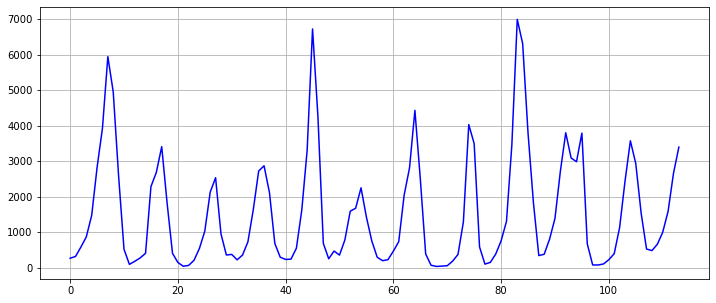

In [2]:
data = np.loadtxt('lynx.txt').T[2]
N = len(data)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data, c='blue')
ax.grid(True)
plt.show()

###  Autocorrelation function (ACF) 

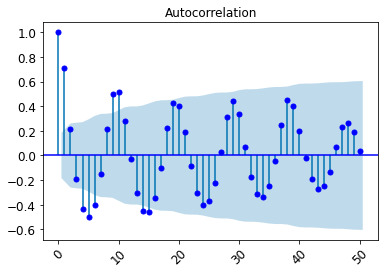

In [3]:
p = 50

plot_acf(data, lags = p,color ='blue')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

###  Partial autocorrelation function (PACF) 

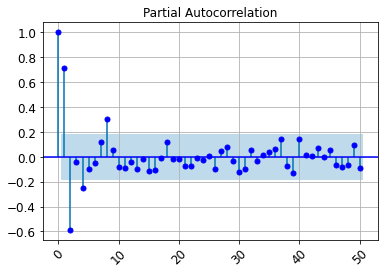

In [4]:
plot_pacf(data, lags = p, method = 'ywmle',color ='blue')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

## Seasonality - statsmodels + STL 



period =  8


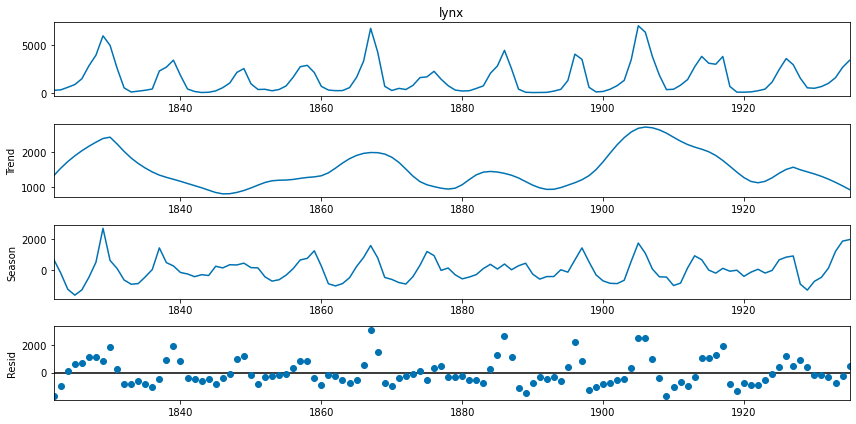



period =  9


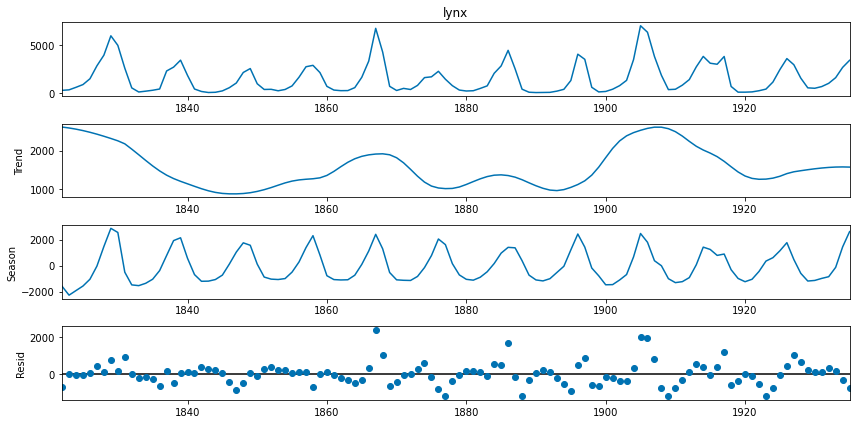



period =  10


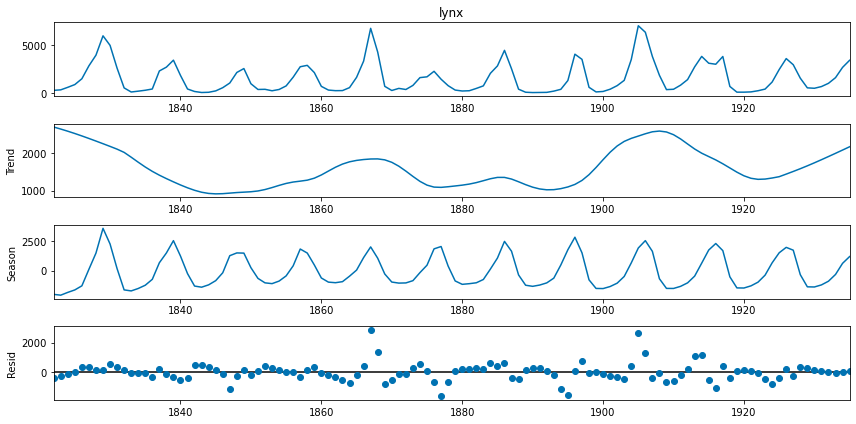

In [5]:
from statsmodels.tsa.seasonal import STL
plt.rcParams["figure.figsize"] = (12,6)

df = pd.Series(data, index=pd.date_range('1821', periods=len(data), freq='Y'), name = 'lynx')
df.describe()

for i in range(8, 11):
    print("\n\nperiod = ", i)
    stl = STL(df, period =i)
    res = stl.fit()
    fig = res.plot()
    plt.show()

## Seasonality - statsmodels + UnobservedComponents 

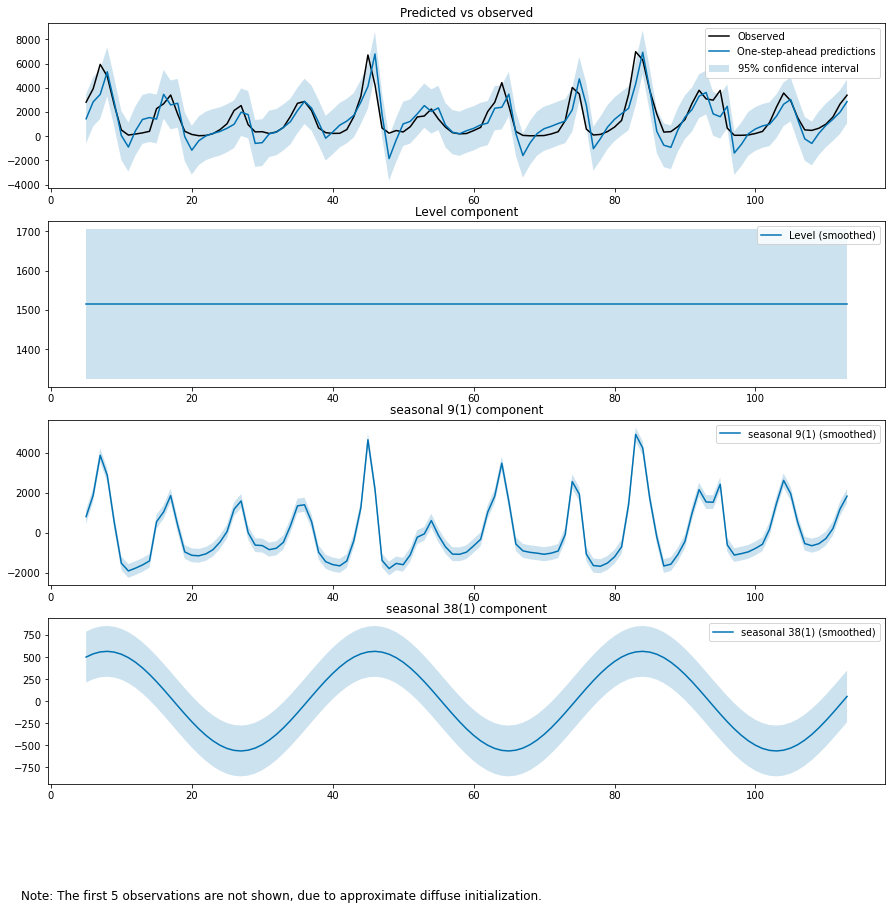

In [6]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 9,
                                                    'harmonics': 1},
                                                   {'period': 38,
                                                    'harmonics': 1},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

#print(res_f.summary())
#print("fixed intercept estimated as {0:.3f}".format(res_f.smoother_results.smoothed_state[0,-1:][0]))

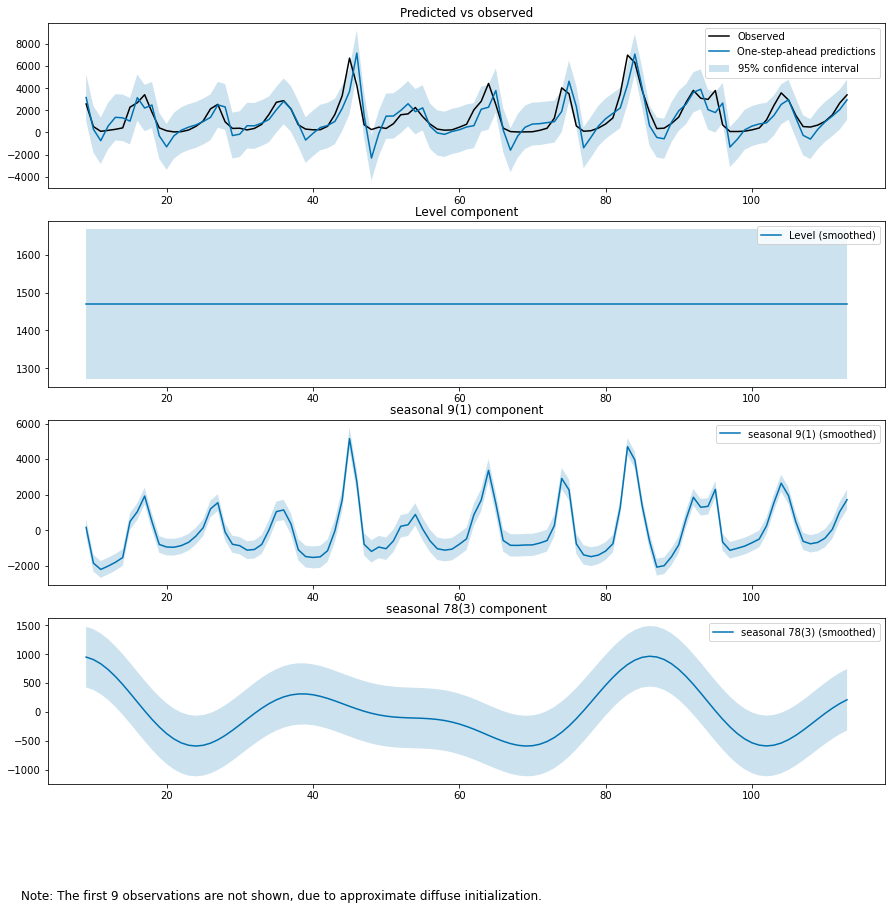

In [7]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 9,
                                                    'harmonics': 1},
                                                   {'period': 78,
                                                    'harmonics': 3},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

#print(res_f.summary())
#print("fixed intercept estimated as {0:.3f}".format(res_f.smoother_results.smoothed_state[0,-1:][0]))

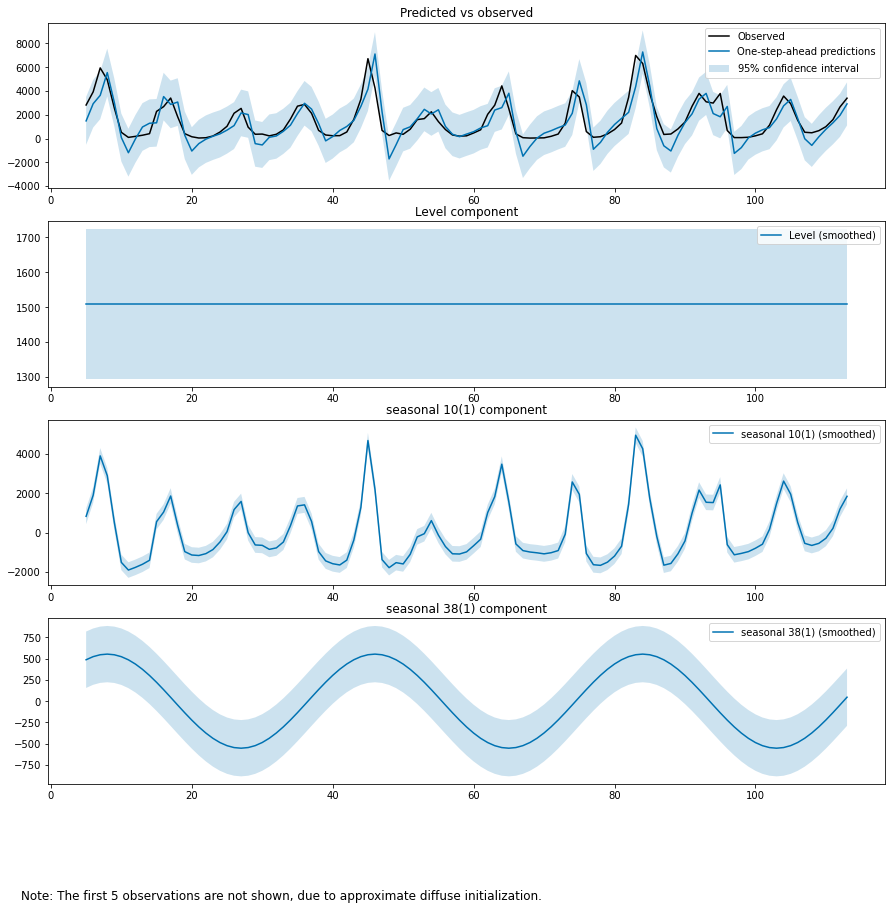

In [8]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 10,
                                                    'harmonics': 1},
                                                   {'period': 38,
                                                    'harmonics': 1},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

#print(res_f.summary())
#print("fixed intercept estimated as {0:.3f}".format(res_f.smoother_results.smoothed_state[0,-1:][0]))

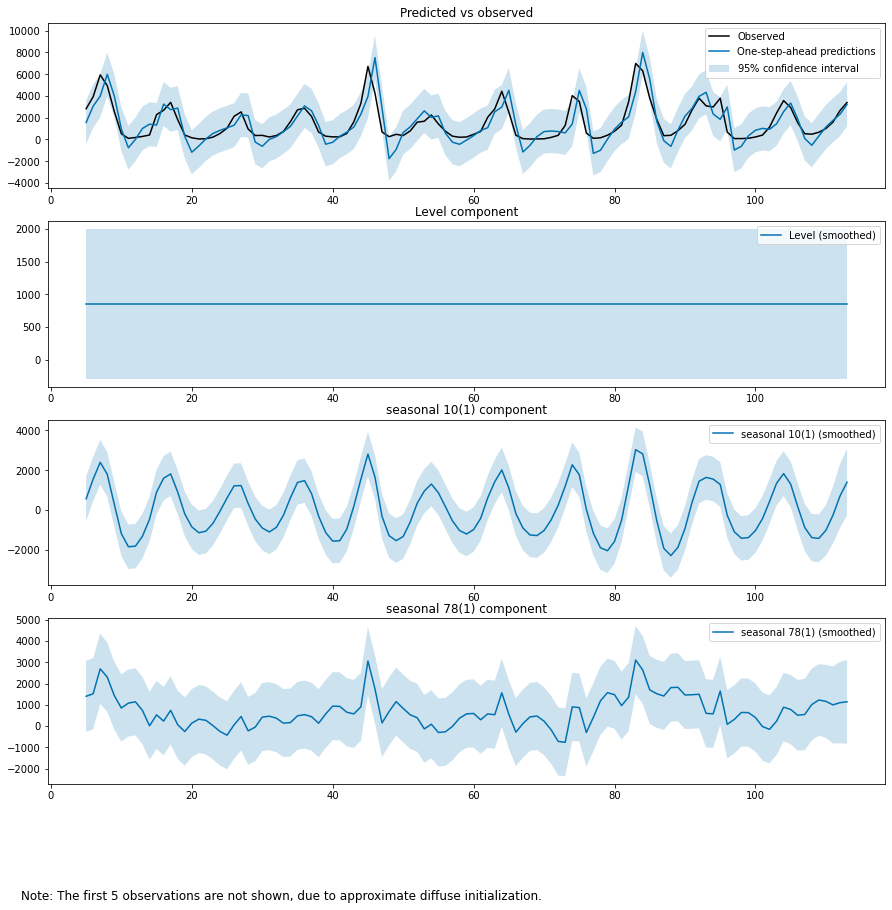

In [9]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 10,
                                                    'harmonics': 1},
                                                   {'period': 78,
                                                    'harmonics': 1},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

#print(res_f.summary())
#print("fixed intercept estimated as {0:.3f}".format(res_f.smoother_results.smoothed_state[0,-1:][0]))

## Fit a seasonal model to the original time series

In [10]:
df = pd.DataFrame(data, columns = ['y_t'])

df['y_(t1)'] = df['y_t'].shift(-1)
df['y_(t2)'] = df['y_t'].shift(-2)
df['y_(t3)'] = df['y_t'].shift(-3)
df['y_(t4)'] = df['y_t'].shift(-4)
df['y_(t5)'] = df['y_t'].shift(-5)
df['y_(t6)'] = df['y_t'].shift(-6)
df['y_(t7)'] = df['y_t'].shift(-7)
df['y_(t8)'] = df['y_t'].shift(-8)
df['y_(t9)'] = df['y_t'].shift(-9)

df['y_(t10)'] = df['y_t'].shift(-10)
df['y_(t11)'] = df['y_t'].shift(-11)
df['y_(t12)'] = df['y_t'].shift(-12)
df['y_(t13)'] = df['y_t'].shift(-13)
df['y_(t14)'] = df['y_t'].shift(-14)
df['y_(t15)'] = df['y_t'].shift(-15)
df['y_(t16)'] = df['y_t'].shift(-16)
df['y_(t17)'] = df['y_t'].shift(-17)
df['y_(t18)'] = df['y_t'].shift(-18)
df['y_(t19)'] = df['y_t'].shift(-19)
df['y_(t20)'] = df['y_t'].shift(-20)


df.dropna(inplace = True)

df['Delta_1'] = df['y_(t1)'] - df['y_t']
df['Delta_2'] = df['y_(t2)'] - df['y_t']
df['Delta_3'] = df['y_(t3)'] - df['y_t']
df['Delta_4'] = df['y_(t4)'] - df['y_t']
df['Delta_5'] = df['y_(t5)'] - df['y_t']
df['Delta_6'] = df['y_(t6)'] - df['y_t']
df['Delta_7'] = df['y_(t7)'] - df['y_t']
df['Delta_8'] = df['y_(t8)'] - df['y_t']
df['Delta_9'] = df['y_(t9)'] - df['y_t']

df['Delta_10'] = df['y_(t10)'] - df['y_t']
df['Delta_11'] = df['y_(t11)'] - df['y_t']
df['Delta_12'] = df['y_(t12)'] - df['y_t']
df['Delta_13'] = df['y_(t13)'] - df['y_t']
df['Delta_14'] = df['y_(t14)'] - df['y_t']
df['Delta_15'] = df['y_(t15)'] - df['y_t']
df['Delta_16'] = df['y_(t16)'] - df['y_t']
df['Delta_17'] = df['y_(t17)'] - df['y_t']
df['Delta_18'] = df['y_(t18)'] - df['y_t']
df['Delta_19'] = df['y_(t19)'] - df['y_t']
df['Delta_20'] = df['y_(t20)'] - df['y_t']

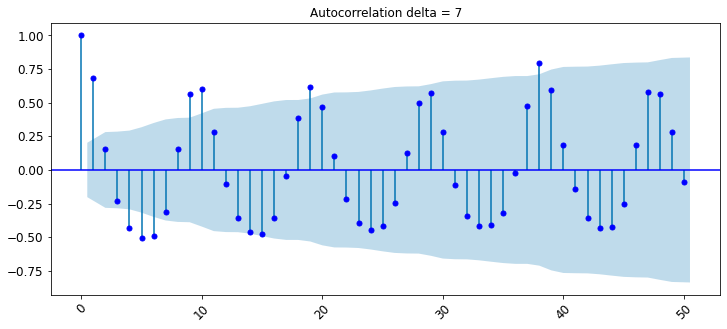

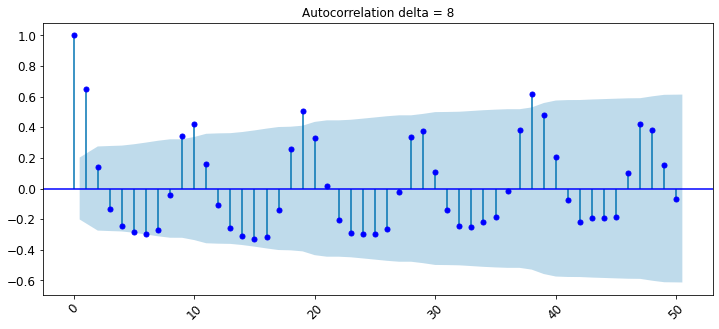

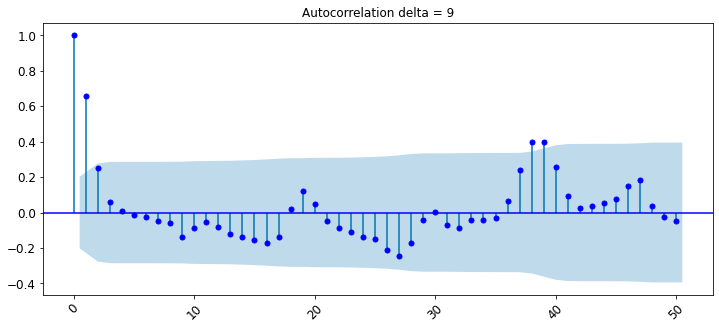

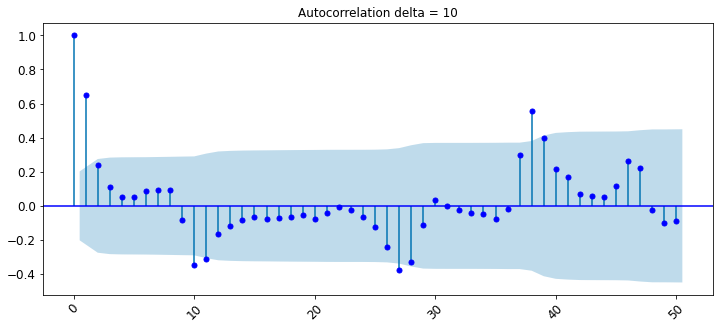

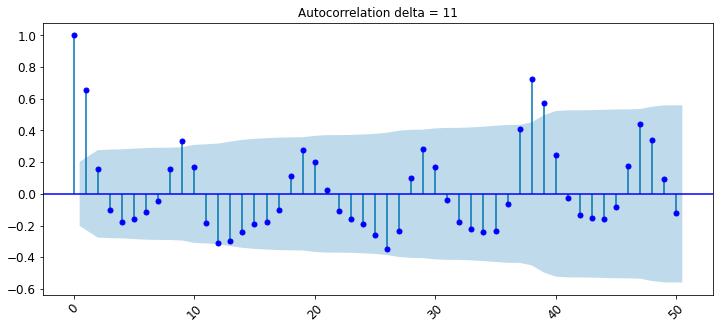

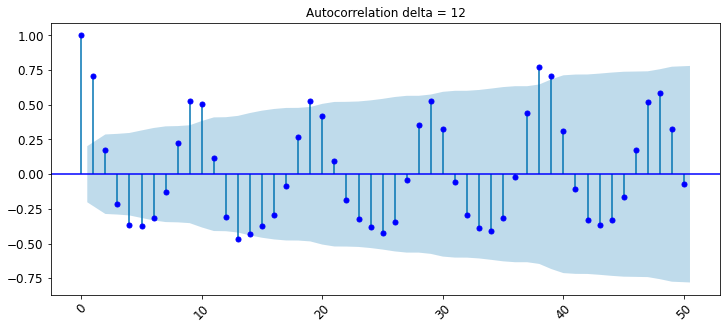

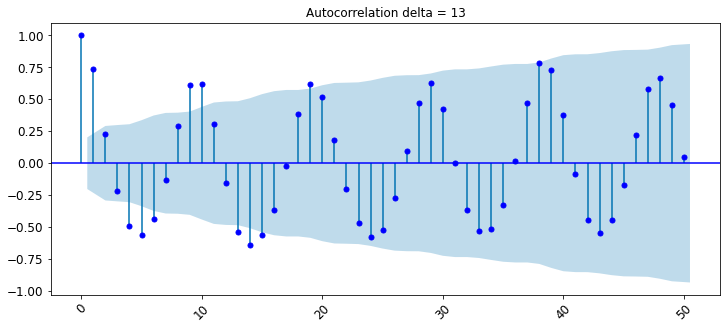

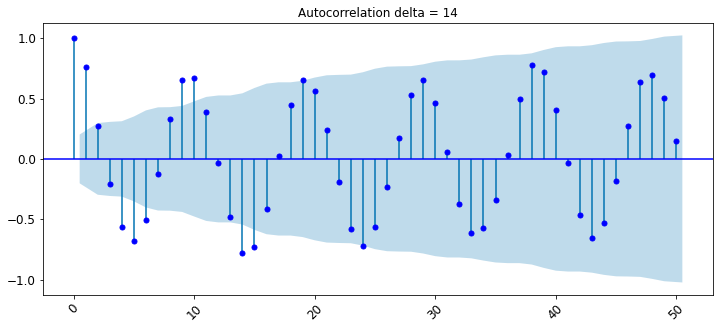

In [11]:
plt.rcParams["figure.figsize"] = (12,5)
p =50
plot_acf(df['Delta_7'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 7')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_8'], lags = p, unbiased=True,color ='blue', title ='Autocorrelation delta = 8')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_9'], lags = p, unbiased=True,color ='blue', title ='Autocorrelation delta = 9')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_10'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 10')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_11'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 11')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


plot_acf(df['Delta_12'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 12')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_13'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 13')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_14'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 14')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


# Final model

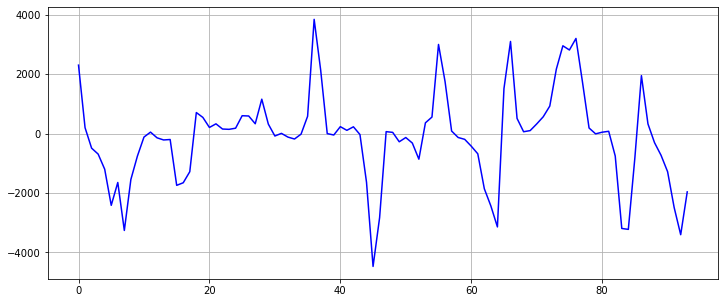

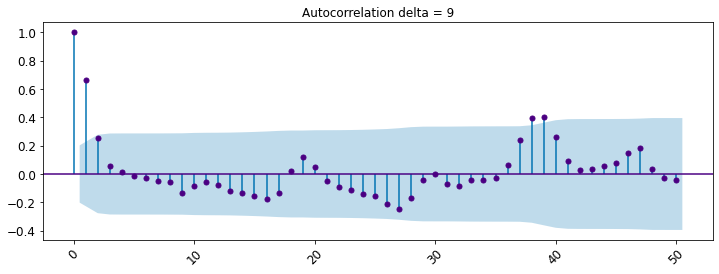

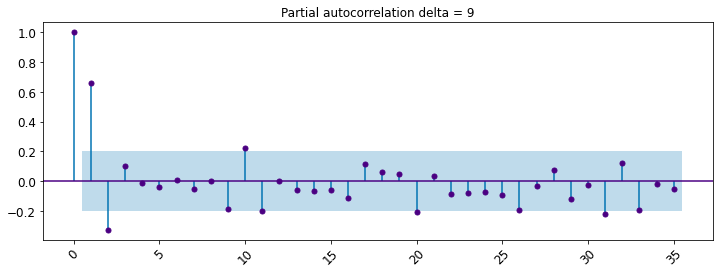

In [12]:
plt.rcParams["figure.figsize"] = (12,4)
p = 50

final_data_1 = np.array(df['Delta_9'])

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(final_data_1, c='blue')
ax.grid(True)
plt.show()

plot_acf(final_data_1, lags = p, unbiased=True, color ='indigo', title ='Autocorrelation delta = 9')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(final_data_1, lags = 35, color ='indigo', title ='Partial autocorrelation delta = 9')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

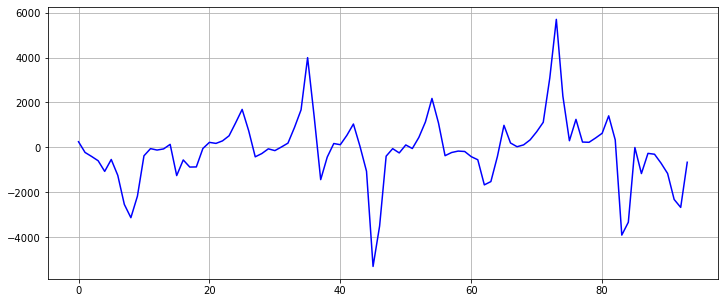

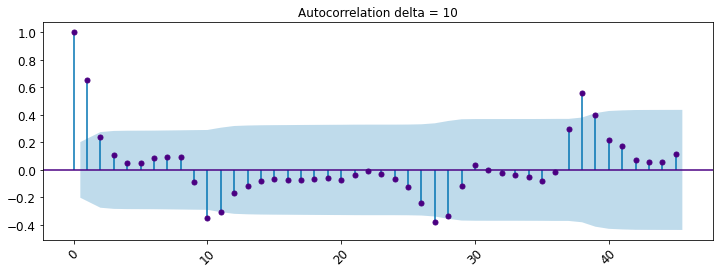

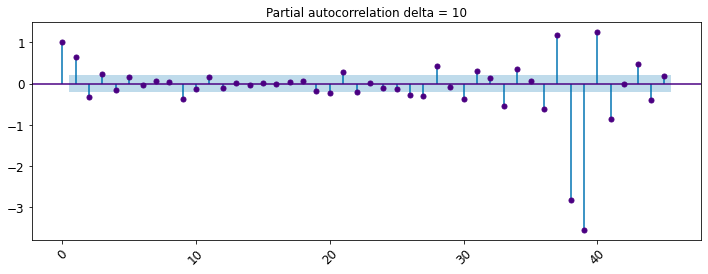

In [13]:
plt.rcParams["figure.figsize"] = (12,4)
p = 45

final_data_2 = np.array(df['Delta_10'])

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(final_data_2, c='blue')
ax.grid(True)
plt.show()

plot_acf(final_data_2, lags = p, unbiased=True, color ='indigo', title ='Autocorrelation delta = 10')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(final_data_2, lags = p, color ='indigo', title ='Partial autocorrelation delta = 10')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Fitting ARMA(p,q) parameters to de-seasonalited data:  brute force method

In [14]:
def check_for_ARMA(dta, p_max, q_max):
    
    aic = pd.DataFrame(np.zeros((p_max, q_max), dtype=float))
    bic = pd.DataFrame(np.zeros((p_max, q_max), dtype=float))

    for p in range(p_max):
        for q in range(q_max):
            if p == 0 and q == 0:
                continue
            try:
                mod = sm.tsa.ARMA(dta, (p,q)).fit()
                aic.iloc[p,q] = mod.aic
                bic.iloc[p,q] = mod.bic

            except:
                aic.iloc[p,q] = np.nan
                bic.iloc[p,q] = np.nan

    return aic, bic

### data with seasonality 9

In [15]:
aic, bic = check_for_ARMA(final_data_1, 8,8)

In [16]:
aic

,0,1,2,3,4,5,6,7
0,0.000000,1598.130959,1587.367799,1588.547030,1590.527498,1592.479582,1593.028026,1587.976073
1,1596.876186,1587.542329,1588.534724,1590.530831,1583.166252,1584.045179,1584.316091,NaN
2,1587.789598,1588.711775,1590.531329,1588.709086,1586.325012,1584.979775,NaN,NaN
3,1588.637668,1590.619845,1592.516869,NaN,NaN,1585.179995,1593.230202,NaN
4,1590.603384,NaN,1594.677079,1582.605261,1590.906947,NaN,1590.217166,NaN
5,1592.351823,1589.258170,1591.017917,NaN,NaN,NaN,NaN,NaN
6,1594.331802,1596.378677,1594.752568,1594.834409,1596.773323,1586.283007,NaN,NaN
7,1596.177021,NaN,NaN,NaN,NaN,NaN,1597.142887,NaN


In [17]:
bic

,0,1,2,3,4,5,6,7
0,0.000000,1605.760843,1597.540979,1601.263504,1605.787267,1610.282646,1613.374384,1610.865726
1,1604.506071,1597.715508,1601.251198,1605.790600,1600.969316,1604.391538,1607.205744,NaN
2,1597.962777,1601.428249,1605.791098,1606.512150,1606.671370,1607.869428,NaN,NaN
3,1601.354142,1605.879613,1610.319933,NaN,NaN,1610.612943,1621.206445,NaN
4,1605.863152,NaN,1615.023437,1605.494914,1616.339895,NaN,1620.736704,NaN
5,1610.154886,1609.604528,1613.907570,NaN,NaN,NaN,NaN,NaN
6,1614.678161,1619.268330,1620.185515,1622.810652,1627.292860,1619.345840,NaN,NaN
7,1619.066674,NaN,NaN,NaN,NaN,NaN,1635.292308,NaN


In [18]:
p = 2
q = 0

model = sm.tsa.ARMA(final_data_1, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

aic = 1587.789597607797	 bic = 1597.962776736877


 parameters: [-91.7238676    0.90142991  -0.34552338]


In [19]:
p = 4
q = 3

model = sm.tsa.ARMA(final_data_1, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

aic = 1582.6052614086534	 bic = 1605.4949144490834


 parameters: [ 4.80588878  0.11909224  1.0790201  -0.08756645 -0.30627725  0.9008616
 -0.9008616  -1.        ]


### data with seasonality 10

In [20]:
aic, bic = check_for_ARMA(final_data_1, 8,8)

In [21]:
aic

,0,1,2,3,4,5,6,7
0,0.000000,1598.130959,1587.367799,1588.547030,1590.527498,1592.479582,1593.028026,1587.976073
1,1596.876186,1587.542329,1588.534724,1590.530831,1583.166252,1584.045179,1584.316091,NaN
2,1587.789598,1588.711775,1590.531329,1588.709086,1586.325012,1584.979775,NaN,NaN
3,1588.637668,1590.619845,1592.516869,NaN,NaN,1585.179995,1593.230202,NaN
4,1590.603384,NaN,1594.677079,1582.605261,1590.906947,NaN,1590.217166,NaN
5,1592.351823,1589.258170,1591.017917,NaN,NaN,NaN,NaN,NaN
6,1594.331802,1596.378677,1594.752568,1594.834409,1596.773323,1586.283007,NaN,NaN
7,1596.177021,NaN,NaN,NaN,NaN,NaN,1597.142887,NaN


In [22]:
bic

,0,1,2,3,4,5,6,7
0,0.000000,1605.760843,1597.540979,1601.263504,1605.787267,1610.282646,1613.374384,1610.865726
1,1604.506071,1597.715508,1601.251198,1605.790600,1600.969316,1604.391538,1607.205744,NaN
2,1597.962777,1601.428249,1605.791098,1606.512150,1606.671370,1607.869428,NaN,NaN
3,1601.354142,1605.879613,1610.319933,NaN,NaN,1610.612943,1621.206445,NaN
4,1605.863152,NaN,1615.023437,1605.494914,1616.339895,NaN,1620.736704,NaN
5,1610.154886,1609.604528,1613.907570,NaN,NaN,NaN,NaN,NaN
6,1614.678161,1619.268330,1620.185515,1622.810652,1627.292860,1619.345840,NaN,NaN
7,1619.066674,NaN,NaN,NaN,NaN,NaN,1635.292308,NaN


In [23]:
p = 2
q = 0

model = sm.tsa.ARMA(final_data_2, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

aic = 1589.1887103674253	 bic = 1599.3618894965052


 parameters: [-109.23070106    0.84013226   -0.31204648]


In [24]:
p = 2
q = 3

model = sm.tsa.ARMA(final_data_2, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

aic = 1588.2250364172342	 bic = 1606.0280998931241


 parameters: [-1.20587110e+02  1.17678330e-01  3.00183410e-01  8.37493000e-01
 -1.08871375e-01 -2.22557414e-01]


# Conclusion:

lynx.txt data has seasonality 9 or 10.

1. For seasonality equal to 9 the best results are obtain for ARMA(4,3) model:
* aic = 1582.61  bic = 1605.49
* parameters: [ 4.80588878  0.11909224  1.0790201  -0.08756645 -0.30627725  0.9008616
 -0.9008616  -1.        ]

2. For seasonality equal to 9 the for AR(2) model:
* aic = 1587.79  bic = 1597.96
* parameters: [-91.7238676    0.90142991  -0.34552338]

3. For seasonality equal to 10 the best results are obtain for ARMA(2,3) model:
* aic = 1588.23 	 bic = 1606.03
* parameters: [-1.20587110e+02  1.17678330e-01  3.00183410e-01  8.37493000e-01
 -1.08871375e-01 -2.22557414e-01]
 

4. For seasonality equal to 10 the for AR(2) model:
* aic = 1589.19	 bic = 1599.36
* parameters:  [-109.23070106    0.84013226   -0.31204648]

 

